1.영화 평균
 

In [ ]:


import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('C:/Users/noctu/Desktop/1/1.2/ch02/movielens/users.dat')
rpath = os.path.expanduser('C:/Users/noctu/Desktop/1/1.2/ch02/movielens/ratings.dat')
mpath = os.path.expanduser('C:/Users/noctu/Desktop/1/1.2/ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding )

data = pd.merge(pd.merge(ratings, users), movies)
data

mean_ratings = mean_ratings = data.pivot_table('rating', index='title',
                                               columns='gender', aggfunc='mean')
mean_ratings[:5]

ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

top_female_ratings = mean_ratings.sort_index(ascending=False)  #by='F'
top_female_ratings[:10]

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values()  #by='diff'
sorted_by_diff[:15]

sorted_by_diff[::-1][:15]

2


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

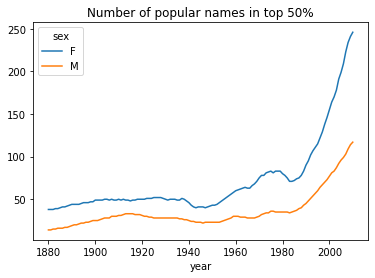

In [35]:
import numpy as np
import pandas as pd

names1880 = pd.read_csv('C:/Users/noctu/Desktop/1/1.2/ch02/names/yob1880.txt',
                        names = ['names', 'sex', 'births'])

names1880.groupby('sex').births.sum()

years = range(1880, 2011)

pieces = []
columns = ['names', 'sex', 'births']

for year in years:
    path = 'C:/Users/noctu/Desktop/1/1.2/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True) 

total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

# total_births.plot(title='Total briths by sex and year')

def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

# top1000

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index='year',
                                 columns='names', aggfunc=sum)

# total_births.info()

subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

# subset.plot(subplots=True, figsize=(12, 10), grid=False,
#             title="Number of births per year")

table = top1000.pivot_table('prop', index='year',
                            columns= 'sex', aggfunc=sum)

# table.plot(title='Sum of top1000.prop by year  and sex',
#            yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

# df = boys[boys.year == 2010]
# df
# prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
# prop_cumsum[:10]
# prop_cumsum.values.searchsorted(0.5)


df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
# in1900.searchsorted(0.5) + 1

def get_quantitle_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantitle_count)
diversity = diversity.unstack('sex')

diversity.head()

diversity.plot(title="Number of popular names in top 50%")